2: Fashion MNIST Clothing Classification
    
Build an image classifier using the Fashion_MNIST dataset.  Use different architectures of CNNs and compare the results.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

2023-03-14 14:38:45.082179: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train=X_train/255.0

In [4]:
X_test=X_test/255.0

In [5]:
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [6]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(60000, 28, 28) (60000, 10)
(10000, 28, 28) (10000, 10)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,MaxPooling2D,Flatten,Conv2D
model=Sequential()
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


2023-03-14 14:39:09.002069: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The **two convolutional layers** in the model are responsible for **learning and detecting features** from the input images.

The **first convolutional layer** has **64 filters** (also called kernels or channels) of **size 3x3**, and uses the **ReLU activation function**. The layer takes as **input the original image (28x28 pixels with 1 color channel), and applies each filter to a local patch of the input image.This produces a set of **64 feature maps**, each representing the presence of a particular feature (such as edges or corners) in the image.

The **output of the first convolutional layer is then passed through a max pooling layer with a pool size of 2x2.**
The pooling layer downsamples the feature maps by selecting the maximum value in each **non-overlapping 2x2 patch.** This reduces the **spatial dimensions of the feature maps by half (from 28x28 to 14x14), while preserving the most important features.**

The **output of the first pooling layer is then passed through the second convolutional layer, which has 32 filters of size 3x3 and uses the ReLU activation function.** This layer applies the same process as the first convolutional layer to the feature maps from the previous layer, producing **another set of 32 feature maps that capture more complex features from the input image.**

The **output of the second convolutional layer is again passed through a max pooling layer with a pool size of 2x2.** This further reduces the **spatial dimensions of the feature maps by half (from 14x14 to 7x7), while preserving the most important features.**

**After the last pooling layer, the output is flattened into a vector and fed into the dense layers of the model for classification.**

**the two convolutional layers with max pooling help the model to learn and extract hierarchical representations of the input images, starting from low-level features such as edges and corners, and progressing to higher-level features such as patterns and textures.**

The **first dense layer has 128 neurons (also known as units or nodes) and uses the ReLU activation function. This layer takes the flattened output from the convolutional and pooling layers as input**, and learns to identify the key features that distinguish between the different clothing categories. **The ReLU activation function helps to introduce non-linearity into the model, allowing it to capture more complex relationships between the input features.**

The **output** of the **first dense layer is then passed through a dropout layer.Dropout is a regularization technique that randomly drops out some of the neurons in the layer during training, forcing the model to learn more robust and generalized features that are not dependent on any single neuron. Here, we set the dropout rate to 0.5, which means that 50% of the neurons in the first dense layer will be randomly dropped out during each training iteration.**

The **output** of **first dropout layer** is then passed to a **dense layer with 128 neurons (also known as units or nodes) and uses the ReLU activation function.**

The **output** of the **second dense layer is then passed through a second dropout layer.Here, we set the dropout rate to 0.5, which means that 50% of the neurons in the second dense layer will be randomly dropped out during each training iteration**

Finally, **the output of the dropout layer is passed through the last dense layer, which has 10 neurons (one for each output class) and uses the softmax activation function. The softmax function computes the probability of each class based on the input features, and the class with the highest probability is selected as the predicted output.**

**Overall, the dense layers in the model learn to map the extracted features from the convolutional and pooling layers to the correct output class, and the dropout layer helps to prevent overfitting by regularizing the model during training.**

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [9]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
#the Convolutional Neural Network (CNN)expects a 4D tensor input with shape (num_samples, height, width, channels).
#Therefore, we reshape the input data,we use the -1 argument for the first dimension to infer the number of samples automatically.
#we set the last dimension to 1 to indicate that the images have only one channel (i.e., grayscale images).

history=model.fit(X_train.reshape(-1, 28, 28, 1), y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 35s 80ms/step - loss: 0.8283 - accuracy: 0.6939 - val_loss: 0.4481 - val_accuracy: 0.8273
Epoch 2/10
422/422 [==============================] - 33s 78ms/step - loss: 0.5035 - accuracy: 0.8182 - val_loss: 0.3690 - val_accuracy: 0.8635
Epoch 3/10
422/422 [==============================] - 41s 97ms/step - loss: 0.4384 - accuracy: 0.8469 - val_loss: 0.3453 - val_accuracy: 0.8708
Epoch 4/10
422/422 [==============================] - 39s 93ms/step - loss: 0.3905 - accuracy: 0.8614 - val_loss: 0.3129 - val_accuracy: 0.8852
Epoch 5/10
422/422 [==============================] - 39s 93ms/step - loss: 0.3588 - accuracy: 0.8731 - val_loss: 0.3051 - val_accuracy: 0.8840
Epoch 6/10
422/422 [==============================] - 36s 84ms/step - loss: 0.3386 - accuracy: 0.8801 - val_loss: 0.3257 - val_accuracy: 0.8758
Epoch 7/10
422/422 [==============================] - 36s 84ms/step - loss: 0.3192 - accuracy: 0.8886 - val_loss: 0.2773 - val_accuracy:

In [11]:
score=model.evaluate(X_test.reshape(-1,28,28,1), y_test, batch_size=10, verbose=1)

1000/1000 [==============================] - 3s 3ms/step - loss: 0.2749 - accuracy: 0.9029


In [12]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.27492403984069824
Test accuracy: 0.902899980545044


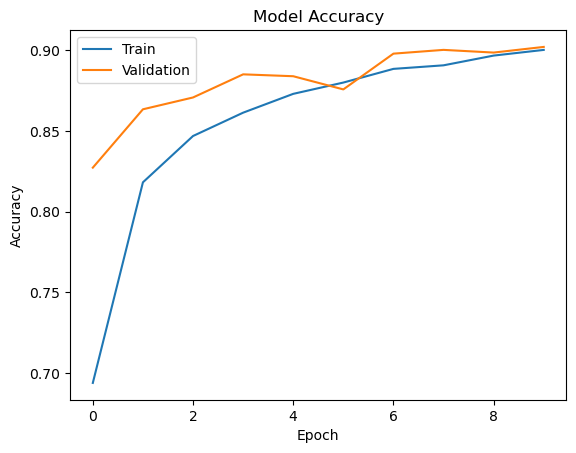

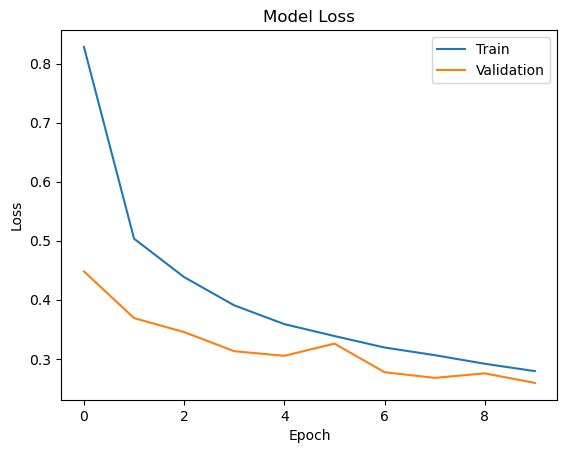

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [14]:
model1=Sequential()
model1.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(10,activation='softmax'))

The Model Architecture here is same as that of the previous Model , Except it use **2 Convolutional layers with 64 filters** which are seperated by a **Maxpool layer** between them. 

In [15]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [16]:
model1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history1=model1.fit(X_train.reshape(-1, 28, 28, 1), y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 54s 127ms/step - loss: 0.8059 - accuracy: 0.7016 - val_loss: 0.4325 - val_accuracy: 0.8292
Epoch 2/10
422/422 [==============================] - 57s 134ms/step - loss: 0.5017 - accuracy: 0.8200 - val_loss: 0.3756 - val_accuracy: 0.8638
Epoch 3/10
422/422 [==============================] - 59s 139ms/step - loss: 0.4242 - accuracy: 0.8502 - val_loss: 0.3204 - val_accuracy: 0.8837
Epoch 4/10
422/422 [==============================] - 58s 137ms/step - loss: 0.3752 - accuracy: 0.8668 - val_loss: 0.2979 - val_accuracy: 0.8888
Epoch 5/10
422/422 [==============================] - 73s 172ms/step - loss: 0.3443 - accuracy: 0.8789 - val_loss: 0.2837 - val_accuracy: 0.8955
Epoch 6/10
422/422 [==============================] - 58s 137ms/step - loss: 0.3192 - accuracy: 0.8867 - val_loss: 0.2717 - val_accuracy: 0.8967
Epoch 7/10
422/422 [==============================] - 50s 118ms/step - loss: 0.3029 - accuracy: 0.8939 - val_loss: 0.2661 - val_ac

In [18]:
score1=model1.evaluate(X_test.reshape(-1,28,28,1), y_test, batch_size=10, verbose=1)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

1000/1000 [==============================] - 3s 3ms/step - loss: 0.2738 - accuracy: 0.9019
Test loss: 0.2737623155117035
Test accuracy: 0.9018999934196472


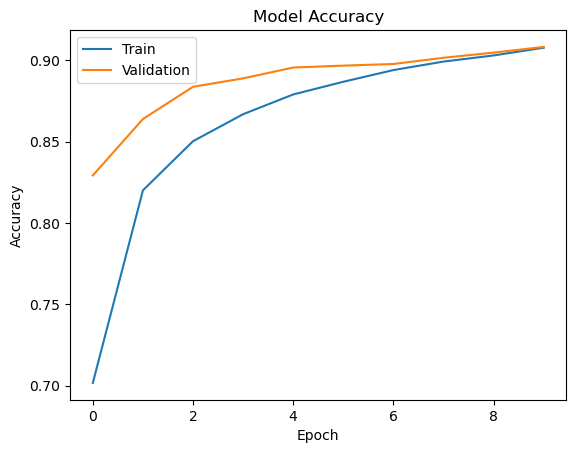

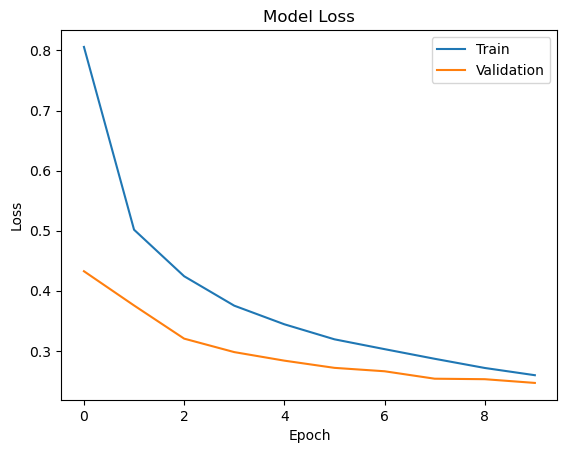

In [19]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [20]:
model2=Sequential()
model2.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10,activation='softmax'))

The **Model Architecture** is same as the previous Model , Except this Model has an **added Dense and Dropout Layer compared to the previous Model**

In [21]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [22]:
model2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history2=model2.fit(X_train.reshape(-1, 28, 28, 1), y_train, batch_size=128, epochs=20, validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 56s 131ms/step - loss: 0.9476 - accuracy: 0.6429 - val_loss: 0.4775 - val_accuracy: 0.8170
Epoch 2/20
422/422 [==============================] - 54s 128ms/step - loss: 0.5645 - accuracy: 0.7961 - val_loss: 0.4193 - val_accuracy: 0.8368
Epoch 3/20
422/422 [==============================] - 66s 155ms/step - loss: 0.4757 - accuracy: 0.8341 - val_loss: 0.3653 - val_accuracy: 0.8657
Epoch 4/20
422/422 [==============================] - 53s 126ms/step - loss: 0.4267 - accuracy: 0.8522 - val_loss: 0.3302 - val_accuracy: 0.8850
Epoch 5/20
422/422 [==============================] - 54s 129ms/step - loss: 0.3932 - accuracy: 0.8671 - val_loss: 0.3164 - val_accuracy: 0.8863
Epoch 6/20
422/422 [==============================] - 50s 118ms/step - loss: 0.3675 - accuracy: 0.8746 - val_loss: 0.2945 - val_accuracy: 0.8963
Epoch 7/20
422/422 [==============================] - 53s 126ms/step - loss: 0.3501 - accuracy: 0.8811 - val_loss: 0.2867 - val_ac

In [25]:
score2=model2.evaluate(X_test.reshape(-1,28,28,1), y_test, batch_size=10, verbose=1)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

1000/1000 [==============================] - 3s 3ms/step - loss: 0.2763 - accuracy: 0.9061
Test loss: 0.2762581408023834
Test accuracy: 0.9060999751091003


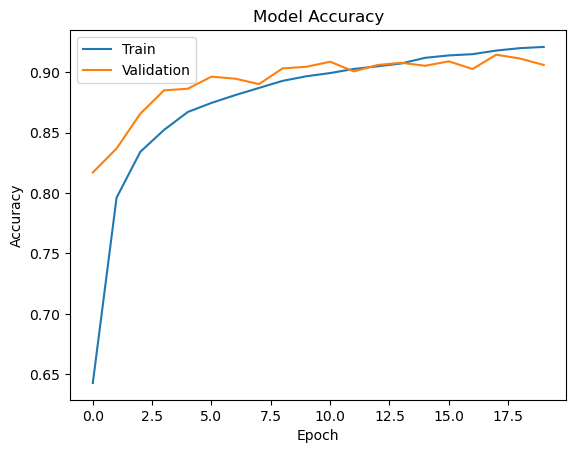

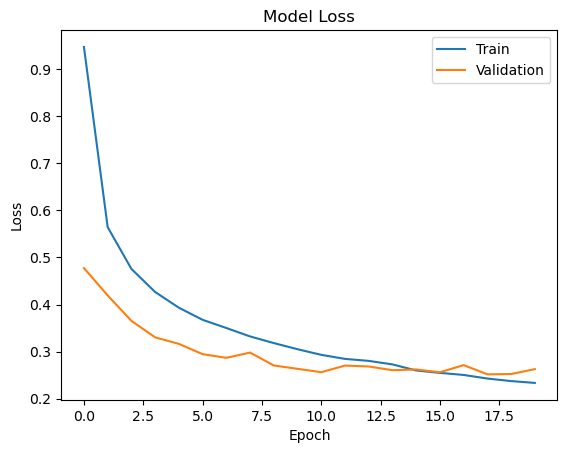

In [26]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

As we can see the above model gave an decent accuracy among all the others built. so predicting on this model

In [27]:
y_pred = model2.predict(X_test.reshape(-1, 28, 28, 1))

313/313 [==============================] - 2s 7ms/step


In [28]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [29]:
y_true = np.argmax(y_test, axis=1)

In [30]:
acc = (np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1)))*100
print('Accuracy:', acc)

Accuracy: 90.61


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred_classes))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1000
           1       1.00      0.98      0.99      1000
           2       0.89      0.82      0.86      1000
           3       0.88      0.95      0.91      1000
           4       0.85      0.88      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.69      0.76      0.72      1000
           7       0.94      0.98      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [32]:
from collections import Counter
c=Counter(list(np.ravel(y_pred_classes)))
c.most_common

<bound method Counter.most_common of Counter({6: 1099, 3: 1071, 7: 1043, 4: 1036, 8: 1010, 5: 996, 1: 984, 9: 969, 2: 918, 0: 874})>

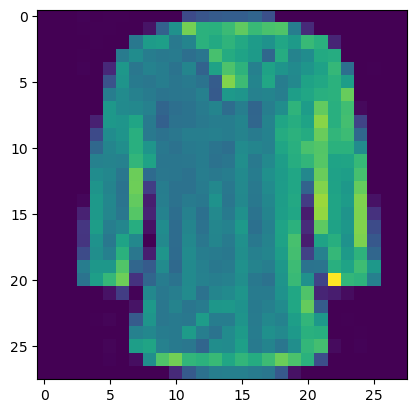

In [33]:
plt.imshow(X_test[np.where(y_pred_classes==6)][0])

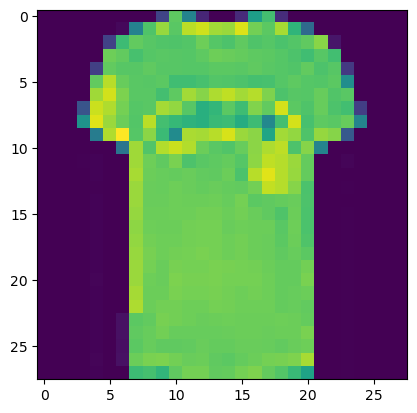

In [34]:
plt.imshow(X_test[np.where(y_pred_classes==0)][0])